## Data Processing - ECS171 Project Group 8

**Description**: Converts true/false entries to 1/0 and normalizes numerical data

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [127]:
#init dataframe
path = 'data/videos oct27-nov1.csv'
df = pd.read_csv(path)

In [128]:
#drop redundant columns
drop_names = ['Unnamed: 0', 'Unnamed: 0.1','Channel_title','Channel_description']
df = df.drop(drop_names,axis=1)

In [129]:
#adds target attribute 'trending' with 1 if trend, 0 if not
trend_list = []
for i in range(0,len(df)):
    if math.isnan(df['trending_date'][i]):
        trend_list.append(0)
    else:
        trend_list.append(1)
df = df.drop('trending_date',axis=1)
df['trending'] = trend_list
df.head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,tags,view_count,likes,dislikes,...,comments_disabled,ratings_disabled,description,Channel_viewCount,Channel_subscriberCount,Channel_hiddenSubscriberCount,Channel_videoCount,Channel_publishedAt,Channel_country,trending
0,zgK6RLgzzxU,Is Bar Bhi milaad - Rabi ul Awal Naat 2020 Rao...,2020-10-27T17:03:00Z,UCrlPBBzSmLuf-FS7fN8P3kg,Rao Brothers,22.0,"""[none]""",143496.0,4006.0,83.0,...,False,False,Artist Rao Brothers Audio Rwds Video Heera Gol...,26066121.0,211000.0,False,288.0,"""2010-09-27T17:02:37Z""","""PK""",0
1,FNXPVrluAC8,Deborah&#39;s Theme (from &quot;Once Upon a Ti...,2020-10-27T17:01:30Z,UCQAmePE--thWfJkRH7fLOyw,Stjepan Hauser - Topic,10.0,"""HAUSER|Ennio Morricone|エンニオ・モリコーネ|エンニオモリコーネ|顏...",20711.0,241.0,7.0,...,False,False,Provided to YouTube by Sony Classical Deborah'...,282237.0,4540.0,False,39.0,"""2013-12-13T18:16:23Z""",NaN,0
2,vxVw3IFnT7w,Malena (from &quot;Malena&quot;),2020-10-27T17:01:30Z,UCQAmePE--thWfJkRH7fLOyw,Stjepan Hauser - Topic,10.0,"""HAUSER|Ennio Morricone|エンニオ・モリコーネ|エンニオモリコーネ|顏...",2381.0,57.0,3.0,...,False,False,Provided to YouTube by Sony Classical Malena (...,282237.0,4540.0,False,39.0,"""2013-12-13T18:16:23Z""",NaN,0


In [130]:
#normalize (StandardScaler)
from sklearn.preprocessing import StandardScaler
names_int = ['categoryId','view_count','likes','dislikes','comment_count','Channel_viewCount','Channel_subscriberCount','Channel_videoCount']
df[names_int] = StandardScaler().fit_transform(df[names_int])

In [131]:
#one hot encode
names_category = ['comments_disabled','ratings_disabled','Channel_hiddenSubscriberCount']

#ohe columns in 'names', returns new df
def ohe(names):
    new_df = df.copy()
    for name in names:
        tmp_df = pd.get_dummies(new_df[name],prefix=name)
        loc = new_df.columns.get_loc(name)
        
        new_df = new_df.drop([name],axis=1)
        for item in tmp_df.columns:
            new_df.insert(loc,column=item,value=tmp_df[item])
            loc += 1
            
        new_df = new_df.drop([name+'_False'],axis=1)
        new_df = new_df.rename(columns={name+'_True':name})
    
    return new_df

#one hot encoded df
df = ohe(names_category)

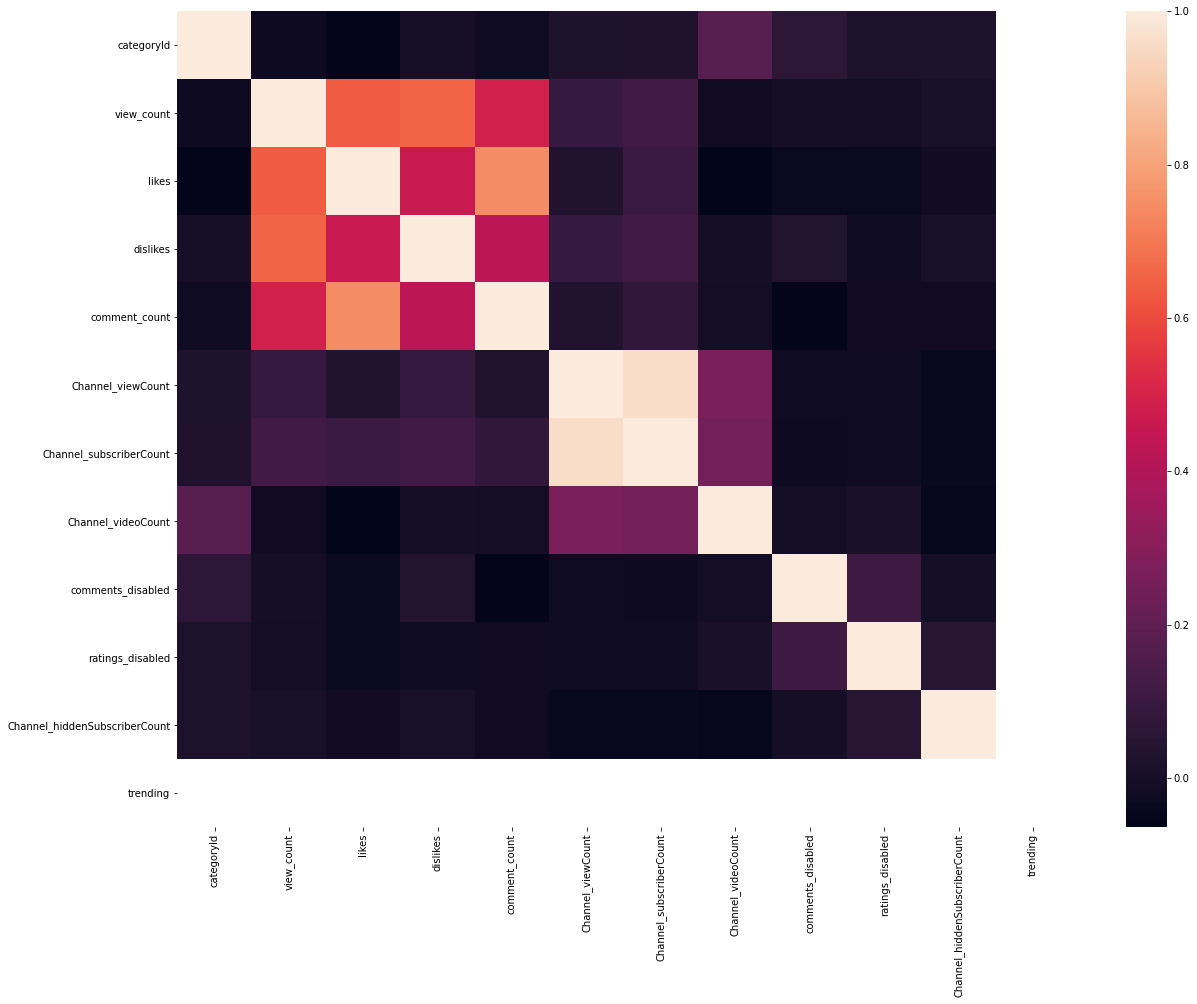

In [132]:
#Plot Data
names_num = ['categoryId','view_count','likes','dislikes','comment_count','Channel_viewCount','Channel_subscriberCount','Channel_videoCount','comments_disabled','ratings_disabled','Channel_hiddenSubscriberCount','trending']
df_num = df[names_num]
plt.subplots(figsize=(20,15))
sns.heatmap(df_num.corr())